## Evaluation of the categorisation used in the final version of the paper

In [157]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import re

## Evaluating the classification and updating the dictionary

After I choose to only take the period 2015-2024

In [217]:
# read in the data
df = pd.read_csv('/Users/emmastoklundlee/Documents/Social Data Science - Masters/Thesis/data/guardian_15-24.csv')

In [219]:
len(df)

64067

In [221]:
women_dictionary = ["Women’s", "NWSL", "England Women", "SheBelieves Cup", "Continental Cup", "USWNT", "Mathildas", "Lionesses",
"Women’s Super League", "WSL", "Women’s Champions League", "Women’s FA Cup", "Continental Cup", "World Cup 2019", "World Cup 2023", "Euro 2017", "Euro 2022", "Euro 2025", "W-league", 
"World Cup 2015", "2017 Euros", "2022 Euros", "Euros 2017", "Euros 2022", "2015 World Cup", "2019 World Cup", "2023 World Cup",
"Women’s World Cup", "Women’s Euros", "A-League Women", "Weigman", "Hayes", "Eidevall", "Phil Neville", "Gustavsson", "Joe Montemurro", "Eni Aluko", "Karen Carney", "Lucy Bronze", "Rapinoe", 
"Sam Kerr", "Miedema", "Ellen White", "Alex Morgan", "Casey Stoney", "Alexia Putellas", "Beth Mead", "Mary Earps", "Keira Walsh", "Kim Little", "Jenni Hermoso", "Kelly Smith", "Nikita Parris"]

In [222]:
men_dictionary = ["Premier League", "Carabao Cup", "World Cup 2018", "World Cup 2022", "Euro 2020", "Euro 2024", "Qatar 2022", "Serie A", "La Liga", 
                  "Ligue 1", "Socceroos", "2018 World Cup", "2022 World Cup", "Europa League", "League One", "League Two", "MLS", "Borussia Dortmund", "Euro 2028", 
                  "Africa Cup of Nations", "Conference League", "A-League Men", "USMNT", "World Cup 2026", "Afcon", "Asian Cup",
                  "Euro 2016", "Euros 2016", "Euros 2020", "2016 Euros", "2020 Euros",
                  "Hillsborough", "Sepp Blatter", "Infantino", "Millwall",
                  "Klopp", "Wenger", "Arteta", "Mourinho", "Pochettino", "Ten Hag", "Solsjær", "Southgate", "Lampard", "Bielsa", "Guardiola", "Conte", "Moyes", 
                  "Postecoglou", "Steve Cooper", "Steve Bruce", "Michael O’Neill", "Tuchel", "Xavi", "Maresca", "Dyche", "Ancelotti", "Lee Carsley", "Sven-Göran Eriksson", 
                  "Eddie Howe", "Hjulmand", "Steve Clarke", "Arne Slot", "Ranieri", "Harry Redknapp", "Brendan Rodgers", "Alex Ferguson", "Platini", "Martin O’Neill", 
                  "Chris Coleman", "Benítez", "Allardyce", "Joachim Löw",
                  "Salah", "Saka", "Haaland", "Messi", "Maradona", "Ronaldo", "Lewandowski", "Rashford", "Sterling", "Pogba", "De Bruyne", "Ibrahimovic", "Cahill", "Rooney", 
                  "Mbappé", "Aubameyang", "Pulisic", "Havertz", "Bobby Charlton", "Griezmann", "Bellingham", "Calvert-Lewin", "Beckham", "Harry Kane", "Alan Shearer", "Gary Lineker", 
                  "Rodri", "Lamine Yamal", "Toni Kroos", "Vinícius Júnior", "Beckenbauer", "Gerrard", "Van Persie", "Lukaku", "Van Gaal", "De Gea", "Gareth Bale", "Luis Suárez", "Balotelli", 
                  "Dani Carvajal", "Sturridge", "Bendtner", "Jack Wilshere", "Joe Hart", "Sergio Ramos", "James Milner", "Jamie Vardy", "Maguire", "Richarlison", "Neymar", "Aaron Ramsey", 
                  "Shaqiri", "Christian Eriksen", "Zaha", "Grealish", "Modrić", "Pickford", "Henderson", "Mesut Özil", "Declan Rice", "Van Dijk", "Cantona", "Emiliano Sala"]

In [223]:
# Drop rows with NaN values in 'article_text' or 'webTitle'
df = df.dropna(subset=['article_text', 'webTitle'])

In [224]:
len(df)

63838

In [225]:
# function for categorising the each article into whether it relates to men's or women's football
def contains_exact_match(text, dictionary):
    if not isinstance(text, str):  # Ensure the text is a string
        return False
    
    # Preprocess text: Convert to lowercase and tokenize (split by words, including handling punctuation)
    text_words = re.findall(r'\b\w+\b', text.lower())

    # Join the tokens back to recreate the text with clean word boundaries
    text_clean = ' '.join(text_words)

    # Check each phrase in the dictionary
    for phrase in dictionary:
        phrase_clean = ' '.join(re.findall(r'\b\w+\b', phrase.lower()))  # Clean the phrase
        if re.search(rf'\b{re.escape(phrase_clean)}\b', text_clean):
            return True
    return False



In [226]:
# Apply the function to both 'article_text' and 'webTitle'
df['womens_dictionary'] = df.apply(
    lambda row: (contains_exact_match(row['article_text'], women_dictionary) or 
                 contains_exact_match(row['webTitle'], women_dictionary)),
    axis=1
)

In [230]:
# Apply the function to both 'article_text' and 'webTitle'
df['mens_dictionary'] = df.apply(
    lambda row: (contains_exact_match(row['article_text'], men_dictionary) or 
                 contains_exact_match(row['webTitle'], men_dictionary)),
    axis=1
)

In [318]:
len(df)

63838

In [316]:
# following update of dictionary method
df['womens_dictionary'].value_counts()

womens_dictionary
False    55610
True      8228
Name: count, dtype: int64

In [317]:
# following update of dictionary method
df['mens_dictionary'].value_counts()

mens_dictionary
True     56469
False     7369
Name: count, dtype: int64

In [233]:
df['men_and_women'] = df['mens_dictionary'] & df['womens_dictionary'] 

In [234]:
df['other'] = ~df['mens_dictionary'] & ~df['womens_dictionary']


In [235]:
df['men_and_women'].value_counts()

men_and_women
False    59303
True      4535
Name: count, dtype: int64

In [236]:
df['other'].value_counts()

other
False    60162
True      3676
Name: count, dtype: int64

In [237]:
for title in df[df['men_and_women']]['webTitle'].iloc[2500:3500]:
    print(title)

Unsure which MLS team to support? Try our watchability rankings
The Fiver | One last lingering look at 10,000 unlucky Spurs supporters?
The Fiver | Gloriously po-faced crying in the media over Eden Hazard smiling
The Fiver | The Premier League finale or some touchline cojone-grabbing?
The Fiver | Villarreal torpedo their far wealthier and more illustrious opponents
‘Work hard and fight hard’: how Melbourne City stopped flattering to deceive | Jonathan Howcroft
Arsenal and Lyon in talks over swapping Nikita Parris and Vivianne Miedema
The Fiver | Try telling Villarreal that this is a rinky-dink tournament
Fifa to look at the possibility of staging World Cups every two years
Premier League 2020-21 review: pundits of the season
Broadcast deal points to brighter future for A-League and W-League | Jonathan Howcroft
From Eriksen trauma to Emma Hayes insight, TV pundits rise to occasion | Barry Glendenning
Younger and more diverse: TV’s team of pundits now reflect their game 
BBC plays it coo

In [238]:
# create a new column allocating numbers to whether women_dictionary is true, men_dictionary is true, both are true, or neither are true
df['classification'] = np.select(
    [
        (df['womens_dictionary'] == True) & (df['mens_dictionary'] == False),  # Women only
        (df['womens_dictionary'] == False) & (df['mens_dictionary'] == True),  # Men only
        (df['womens_dictionary'] == True) & (df['mens_dictionary'] == True),   # Both women and men
        df['men_and_women'] == True,                                            # If 'men_and_women' is a separate category
        df['other'] == True                                                     # Neither men nor women
    ],
    [
        '1',   # Code for women only
        '2',     # Code for men only
        '3',    # Code for both women and men
        '3',    # If 'men_and_women' explicitly indicates both
        '0'  # Code for neither (based on 'other')
    ],
    
)
 

In [266]:
df['classification'].value_counts()

classification
2    51934
3     4535
1     3693
0     3676
Name: count, dtype: int64

In [267]:
# create random subset of 500 articles with equal representation of each classification
df_subset = df.groupby('classification').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

In [268]:
df_subset['classification'].value_counts()

classification
0    100
1    100
2    100
3    100
Name: count, dtype: int64

In [269]:
# export the subset to a excel file - this is the subset prior to annotation 
df_subset.to_csv('/Users/emmastoklundlee/levelingtheplayingfield/data/guardian_15-24_subset.csv', index=False)

## Merging the subset which has been labelled with the new classification
The subset has been manually label for validation purposes

In [270]:
# read in excel file
guardian_annotated = pd.read_excel('../levelingtheplayingfield/data/guardian_15-24_subset_updated.xlsx')


In [271]:
# drop columns with unnamed: 
guardian_annotated = guardian_annotated.loc[:, ~guardian_annotated.columns.str.contains('^Unnamed')]
guardian_annotated.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,womens_dictionary,mens_dictionary,men_and_women,other,liveblog,month_year,classification,annotation
0,article,Football,Manchester City to pay Wilfried Bony an extra ...,https://www.theguardian.com/football/2015/jan/...,2015-01-14 00:00:00,Manchester City to pay Wilfried Bony an extra ...,"Wilfried Bony will earn a ¬£20,000-a-game bonu...",337,Jamie Jackson,1765,False,False,False,True,0,2015-01-01 00:00:00,0,2
1,article,Football,Norway‚Äôs Martin Odegaard looks set to sign f...,https://www.theguardian.com/football/2015/jan/...,2015-01-07 00:00:00,Norway‚Äôs Martin Odegaard looks set to sign f...,The battle to sign up Norway‚Äôs 16-year-old f...,113,Peter Mason,706,False,False,False,True,0,2015-01-01 00:00:00,0,2
2,article,Football,Leicester City break transfer record to sign C...,https://www.theguardian.com/football/2015/jan/...,2015-01-07 00:00:00,Leicester City break transfer record to sign C...,Leicester City have agreed the signing of Andr...,196,Stuart James,1180,False,False,False,True,0,2015-01-01 00:00:00,0,2
3,article,Football,Massimo Cellino cooked Leeds squad‚Äôs pre-mat...,https://www.theguardian.com/football/2015/jan/...,2015-01-21 00:00:00,Massimo Cellino cooked Leeds squad‚Äôs pre-mat...,Massimo Cellino provided the secret ingredient...,408,James Riach,2354,False,False,False,True,0,2015-01-01 00:00:00,0,2
4,article,Football,Wolfsburg player Junior Malanda dies aged 20 a...,https://www.theguardian.com/football/2015/jan/...,2015-01-10 00:00:00,Wolfsburg player Junior Malanda dies aged 20 a...,Wolfsburg‚Äôs Belgium Under-21s player Junior ...,127,Guardian sport and Associated Press,737,False,False,False,True,0,2015-01-01 00:00:00,0,2


In [273]:
# count values of Annotation column
guardian_annotated['annotation'].value_counts()

annotation
2                                                                                                                                                                                                                                                                                                        209
1                                                                                                                                                                                                                                                                                                        127
3                                                                                                                                                                                                                                                                                                         33
0                                                                                     

### I first check these statistics based on the fact that all which are in the category both also pertain to both the men's category and women's category. Thus meaning in actual fact there are 200 articles of 400 dicussing men's football and women's football respectively.

However these statistics aren't used in the final version of my paper.

In [275]:
# drop rows where annotation is not 0, 1, 2 or 3
# Filter the DataFrame to keep only rows where 'annotation' is 0, 1, 2, or 3
guardian_annotated = guardian_annotated[guardian_annotated['annotation'].isin([0, 1, 2, 3])]


In [277]:
guardian_annotated['annotation'].value_counts()

annotation
2    209
1    127
3     33
0     31
Name: count, dtype: int64

In [279]:
# check number of true mens_dictionary are 2 in Annotation column
guardian_annotated[guardian_annotated['annotation'] == 2]['mens_dictionary'].value_counts()

mens_dictionary
True     139
False     70
Name: count, dtype: int64

In [289]:
# create new column for men_annotation where 'Annotation' is 2 display True
guardian_annotated['men_annotation'] = guardian_annotated['annotation'] == 2 

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/231824993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['men_annotation'] = guardian_annotated['annotation'] == 2


In [290]:
guardian_annotated['women_annotation'] = guardian_annotated['annotation'] == 1
guardian_annotated.head()

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/2378402258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['women_annotation'] = guardian_annotated['annotation'] == 1


,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,womens_dictionary,mens_dictionary,men_and_women,other,liveblog,month_year,classification,annotation,men_annotation,women_annotation
0,article,Football,Manchester City to pay Wilfried Bony an extra ...,https://www.theguardian.com/football/2015/jan/...,2015-01-14 00:00:00,Manchester City to pay Wilfried Bony an extra ...,"Wilfried Bony will earn a ¬£20,000-a-game bonu...",337,Jamie Jackson,1765,False,0,False,True,0,2015-01-01 00:00:00,0,2,True,False
1,article,Football,Norway‚Äôs Martin Odegaard looks set to sign f...,https://www.theguardian.com/football/2015/jan/...,2015-01-07 00:00:00,Norway‚Äôs Martin Odegaard looks set to sign f...,The battle to sign up Norway‚Äôs 16-year-old f...,113,Peter Mason,706,False,0,False,True,0,2015-01-01 00:00:00,0,2,True,False
2,article,Football,Leicester City break transfer record to sign C...,https://www.theguardian.com/football/2015/jan/...,2015-01-07 00:00:00,Leicester City break transfer record to sign C...,Leicester City have agreed the signing of Andr...,196,Stuart James,1180,False,0,False,True,0,2015-01-01 00:00:00,0,2,True,False
3,article,Football,Massimo Cellino cooked Leeds squad‚Äôs pre-mat...,https://www.theguardian.com/football/2015/jan/...,2015-01-21 00:00:00,Massimo Cellino cooked Leeds squad‚Äôs pre-mat...,Massimo Cellino provided the secret ingredient...,408,James Riach,2354,False,0,False,True,0,2015-01-01 00:00:00,0,2,True,False
4,article,Football,Wolfsburg player Junior Malanda dies aged 20 a...,https://www.theguardian.com/football/2015/jan/...,2015-01-10 00:00:00,Wolfsburg player Junior Malanda dies aged 20 a...,Wolfsburg‚Äôs Belgium Under-21s player Junior ...,127,Guardian sport and Associated Press,737,False,0,False,True,0,2015-01-01 00:00:00,0,2,True,False


In [292]:
# check number of true womens_dictionary are 1 in Annotation column
guardian_annotated[guardian_annotated['annotation'] == 2]['mens_dictionary'].value_counts()

mens_dictionary
1    139
0     70
Name: count, dtype: int64

In [293]:
# Replace string 'True' and 'False' with actual booleans, handling other cases
guardian_annotated['mens_dictionary'] = guardian_annotated['mens_dictionary'].replace({'True': True, 'False': False})

# Convert the column to boolean, replacing any non-matching values with False
guardian_annotated['mens_dictionary'] = guardian_annotated['mens_dictionary'].fillna(False).astype(bool)



/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/2482711709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['mens_dictionary'] = guardian_annotated['mens_dictionary'].replace({'True': True, 'False': False})
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/2482711709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['mens_dictionary'] = guardian_annotated['mens_dictionary'].fillna(False).astype(bool)


In [294]:
# Convert boolean columns to binary (0 and 1)
guardian_annotated['mens_dictionary'] = guardian_annotated['mens_dictionary'].astype(int)
guardian_annotated['men_annotation'] = guardian_annotated['men_annotation'].astype(int)

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/3361665577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['mens_dictionary'] = guardian_annotated['mens_dictionary'].astype(int)
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/3361665577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['men_annotation'] = guardian_annotated['men_annotation'].astype(int)


In [295]:
# Calculate precision, recall, and F1 score
precision = precision_score(guardian_annotated['men_annotation'], guardian_annotated['mens_dictionary'], zero_division=0)
recall = recall_score(guardian_annotated['men_annotation'], guardian_annotated['mens_dictionary'], zero_division=0)
f1 = f1_score(guardian_annotated['men_annotation'], guardian_annotated['mens_dictionary'], zero_division=0)

# Output the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6984924623115578
Recall: 0.6650717703349283
F1 Score: 0.6813725490196079


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_s

In [296]:
# check number of true womens_dictionary are 1 in Annotation column
guardian_annotated[guardian_annotated['annotation'] == 1]['womens_dictionary'].value_counts()

womens_dictionary
True     121
False      5
Name: count, dtype: int64

In [297]:
# Replace string 'True' and 'False' with actual booleans, handling other cases
guardian_annotated['womens_dictionary'] = guardian_annotated['womens_dictionary'].replace({'True': True, 'False': False})

# Convert the column to boolean, replacing any non-matching values with False
guardian_annotated['womens_dictionary'] = guardian_annotated['womens_dictionary'].fillna(False).astype(bool)

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/2343704425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['womens_dictionary'] = guardian_annotated['womens_dictionary'].replace({'True': True, 'False': False})
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/2343704425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['womens_dictionary'] = guardian_annotated['womens_dictionary'].fillna(False).astype(bool)


In [298]:
# Convert boolean columns to binary (0 and 1)
guardian_annotated['womens_dictionary'] = guardian_annotated['womens_dictionary'].astype(int)
guardian_annotated['women_annotation'] = guardian_annotated['women_annotation'].astype(int)

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/242364816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['womens_dictionary'] = guardian_annotated['womens_dictionary'].astype(int)
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/242364816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['women_annotation'] = guardian_annotated['women_annotation'].astype(int)


In [299]:
# Calculate precision, recall, and F1 score
precision = precision_score(guardian_annotated['women_annotation'], guardian_annotated['womens_dictionary'], zero_division=0)
recall = recall_score(guardian_annotated['women_annotation'], guardian_annotated['womens_dictionary'], zero_division=0)
f1 = f1_score(guardian_annotated['women_annotation'], guardian_annotated['womens_dictionary'], zero_division=0)

# Output the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6111111111111112
Recall: 0.952755905511811
F1 Score: 0.7446153846153847


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_s

In [302]:


# capturing a lot of the postive womens dictionary which is good 
# check number of men_and_women are 3 in Annotation column
guardian_annotated[guardian_annotated['annotation'] == 3]['men_and_women'].value_counts()


men_and_women
True     21
False    11
Name: count, dtype: int64

In [303]:
# check number of other are 0 in Annotation column
guardian_annotated[guardian_annotated['annotation'] == 0]['other'].value_counts()

other
True     22
False     9
Name: count, dtype: int64

In [304]:
guardian_annotated['both_annotation'] = guardian_annotated['annotation'] == 3
guardian_annotated['other_annotation'] = guardian_annotated['annotation'] == 0 

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/3348186993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['both_annotation'] = guardian_annotated['annotation'] == 3
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/3348186993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['other_annotation'] = guardian_annotated['annotation'] == 0


In [305]:
# check for both

# Replace string 'True' and 'False' with actual booleans, handling other cases
guardian_annotated['men_and_women'] = guardian_annotated['men_and_women'].replace({'True': True, 'False': False})

# Convert the column to boolean, replacing any non-matching values with False
guardian_annotated['men_and_women'] = guardian_annotated['men_and_women'].fillna(False).astype(bool)

# Convert boolean columns to binary (0 and 1)
guardian_annotated['men_and_women'] = guardian_annotated['men_and_women'].astype(int)
guardian_annotated['both_annotation'] = guardian_annotated['both_annotation'].astype(int)

precision = precision_score(guardian_annotated['both_annotation'], guardian_annotated['men_and_women'], zero_division=0)
recall = recall_score(guardian_annotated['both_annotation'], guardian_annotated['men_and_women'], zero_division=0)
f1 = f1_score(guardian_annotated['both_annotation'], guardian_annotated['men_and_women'], zero_division=0)

# Output the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.21212121212121213
Recall: 0.6363636363636364
F1 Score: 0.3181818181818182


/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/1261845968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['men_and_women'] = guardian_annotated['men_and_women'].replace({'True': True, 'False': False})
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/1261845968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['men_and_women'] = guardian_annotated['men_and_women'].fillna(False).astype(bool)
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f0000

In [126]:
# check for other

# Replace string 'True' and 'False' with actual booleans, handling other cases
guardian_annotated['other'] = guardian_annotated['other'].replace({'True': True, 'False': False})

# Convert the column to boolean, replacing any non-matching values with False
guardian_annotated['other'] = guardian_annotated['other'].fillna(False).astype(bool)

# Convert boolean columns to binary (0 and 1)
guardian_annotated['other'] = guardian_annotated['other'].astype(int)
guardian_annotated['other_annotation'] = guardian_annotated['other_annotation'].astype(int)

precision = precision_score(guardian_annotated['other_annotation'], guardian_annotated['other'], zero_division=0)
recall = recall_score(guardian_annotated['other_annotation'], guardian_annotated['other'], zero_division=0)
f1 = f1_score(guardian_annotated['other_annotation'], guardian_annotated['other'], zero_division=0)

# Output the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.06
Recall: 0.46153846153846156
F1 Score: 0.10619469026548674


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_s

In [306]:
print(guardian_annotated['annotation'].isna().sum())
print(guardian_annotated['classification'].isna().sum())


0
2


In [307]:
# Drop rows with missing values in either column
guardian_annotated = guardian_annotated.dropna(subset=['annotation', 'classification'])


In [308]:
# Check data types of the columns
print(guardian_annotated['annotation'].dtype)
print(guardian_annotated['classification'].dtype)


object
object


In [309]:
# Convert both columns to integer types if necessary
guardian_annotated['annotation'] = guardian_annotated['annotation'].astype(int)
guardian_annotated['classification'] = guardian_annotated['classification'].astype(int)


/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/2957081939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['annotation'] = guardian_annotated['annotation'].astype(int)
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_5988/2957081939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_annotated['classification'] = guardian_annotated['classification'].astype(int)


In [312]:
# Generate confusion matrix
conf_matrix = confusion_matrix(guardian_annotated['annotation'], guardian_annotated['classification'])
print(conf_matrix)


[[22  3  3  3]
 [ 5 89  0 32]
 [69  1 96 43]
 [ 4  6  1 21]]


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_s

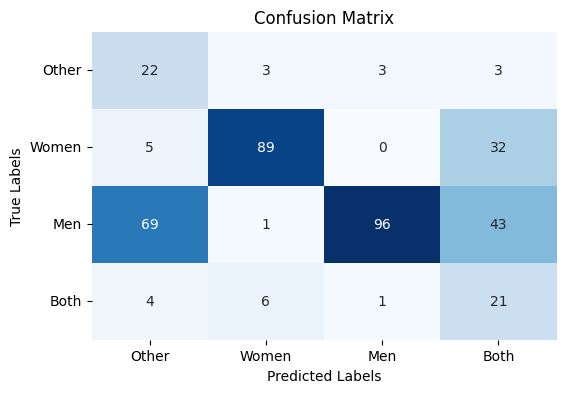

In [313]:


# Step 2: Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Step 3: Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Set tick marks to show class labels (0, 1, 2, 3, etc.)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Other', 'Women', 'Men', 'Both'], rotation=0)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Other', 'Women', 'Men', 'Both'], rotation=0)

# Show the plot
plt.show()

### Below are the classification statistics used in the final paper

In [314]:
# Generate classification report
print(classification_report(guardian_annotated['annotation'], guardian_annotated['classification']))


              precision    recall  f1-score   support

           0       0.22      0.71      0.34        31
           1       0.90      0.71      0.79       126
           2       0.96      0.46      0.62       209
           3       0.21      0.66      0.32        32

    accuracy                           0.57       398
   macro avg       0.57      0.63      0.52       398
weighted avg       0.82      0.57      0.63       398



/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_s